In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='latin1')

data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [22]:
print("shape",data.shape,"\n")

print(data.info(),"\n")

print("data.isnull")
print(data.isnull().sum(),"\n")

print("data.duplicated",data.duplicated().sum(),"\n")

shape (2823, 25) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 n

In [23]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [24]:
cleaned_data = data.copy()


In [25]:
cols_to_drop = [
    'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 
    'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 
    'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'
]

cleaned_data.drop(columns=cols_to_drop, inplace=True)

display(cleaned_data.head())  
print("shape", cleaned_data.shape)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium


shape (2823, 13)


In [26]:
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   PRODUCTLINE      2823 non-null   object 
 7   MSRP             2823 non-null   int64  
 8   PRODUCTCODE      2823 non-null   object 
 9   CUSTOMERNAME     2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 286.8+ KB


In [27]:
# تحويل ORDERDATE إلى نوع التاريخ
cleaned_data['ORDERDATE'] = pd.to_datetime(cleaned_data['ORDERDATE'], format='%m/%d/%Y %H:%M')

# التأكد من النوع
print(cleaned_data.dtypes)


ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
SALES                     float64
ORDERDATE          datetime64[ns]
STATUS                     object
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
CITY                       object
COUNTRY                    object
DEALSIZE                   object
dtype: object


In [28]:
# نعرض فقط الأعمدة النصية (object) من النسخة النظيفة
object_cols = cleaned_data.select_dtypes(include='object').columns

# نعرض عدد القيم الفريدة في كل عمود نصي
for col in object_cols:
    print(f"{col}: {cleaned_data[col].nunique()} ")


STATUS: 6 
PRODUCTLINE: 7 
PRODUCTCODE: 109 
CUSTOMERNAME: 92 
CITY: 73 
COUNTRY: 19 
DEALSIZE: 3 


In [29]:
# تحويل الأعمدة الفئوية في النسخة النظيفة
categorical_cols = ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']
cleaned_data[categorical_cols] = cleaned_data[categorical_cols].astype('category')

# التأكد من نوع البيانات بعد التغيير
print(cleaned_data.dtypes)


ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
SALES                     float64
ORDERDATE          datetime64[ns]
STATUS                   category
PRODUCTLINE              category
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
CITY                       object
COUNTRY                  category
DEALSIZE                 category
dtype: object


In [30]:
text_cols = ['STATUS', 'PRODUCTLINE', 'CUSTOMERNAME', 'CITY', 'COUNTRY', 'DEALSIZE']

print(" عدد القيم الفريدة قبل التوحيد\n")
for col in text_cols:
    print(f"{col}: {cleaned_data[col].nunique()}")

# توحيد النصوص
for col in text_cols:
    cleaned_data[col] = cleaned_data[col].str.strip()           # حذف المسافات الزائدة
    cleaned_data[col] = cleaned_data[col].str.lower()           # تحويل للحروف الصغيرة
    cleaned_data[col] = cleaned_data[col].str.replace('-', ' ') # استبدال الشرطة "-"
    cleaned_data[col] = cleaned_data[col].str.replace('_', ' ') # استبدال الشرطة السفلية "_"

print("\n عدد القيم الفريدة بعد التوحيد\n")
for col in text_cols:
    print(f"{col}: {cleaned_data[col].nunique()}")


 عدد القيم الفريدة قبل التوحيد

STATUS: 6
PRODUCTLINE: 7
CUSTOMERNAME: 92
CITY: 73
COUNTRY: 19
DEALSIZE: 3

 عدد القيم الفريدة بعد التوحيد

STATUS: 6
PRODUCTLINE: 7
CUSTOMERNAME: 92
CITY: 73
COUNTRY: 19
DEALSIZE: 3


In [31]:
print(cleaned_data.isnull().sum())


ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
ORDERDATE          0
STATUS             0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
COUNTRY            0
DEALSIZE           0
dtype: int64


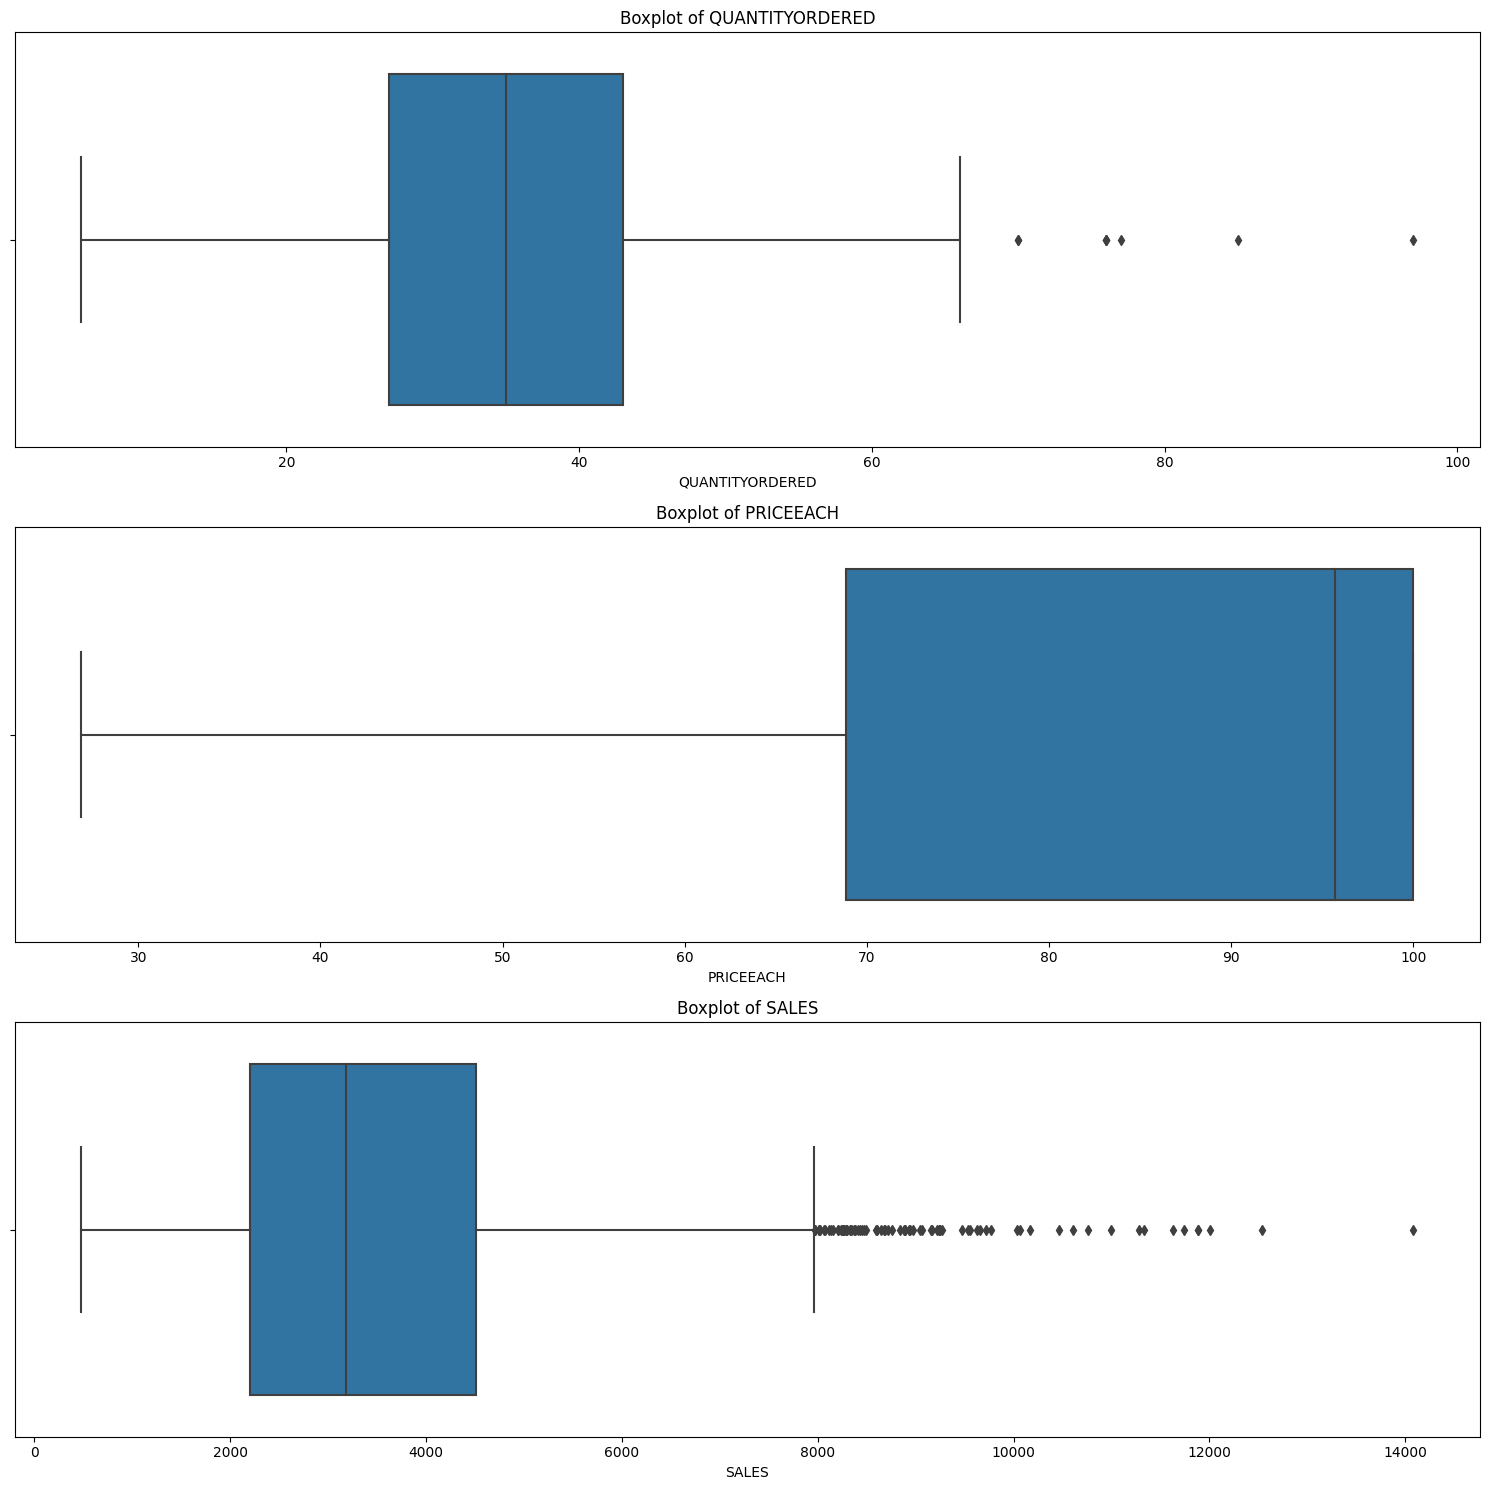

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# الأعمدة الرقمية
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']

# إعداد الشكل
plt.figure(figsize=(15, 5*len(numeric_cols)))  # حجم مناسب للعرض

# رسم Boxplot لكل عمود
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=cleaned_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [33]:
from scipy.stats import zscore

numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']

for col in numeric_cols:
    z_scores = zscore(cleaned_data[col])
    outliers = (abs(z_scores) > 3)
    print(f"{col}", outliers.sum())


QUANTITYORDERED 14
PRICEEACH 0
SALES 30


In [34]:
from scipy.stats import zscore

numeric_cols = ['QUANTITYORDERED', 'SALES']

for col in numeric_cols:
    z_scores = zscore(cleaned_data[col])
    outliers = abs(z_scores) > 3
    print(f"\n{col}")
    display(cleaned_data.loc[outliers, ['ORDERNUMBER', 'CUSTOMERNAME', 'QUANTITYORDERED', 'PRICEEACH', 'SALES']])



QUANTITYORDERED


,ORDERNUMBER,CUSTOMERNAME,QUANTITYORDERED,PRICEEACH,SALES
25,10417,euro shopping channel,66,100.00,7516.08
104,10403,"uk collectables, ltd.",66,100.00,11886.60
264,10403,"uk collectables, ltd.",66,100.00,8648.64
418,10405,mini caravy,97,93.28,9048.16
598,10407,the sharp gifts warehouse,76,100.00,14082.80
1188,10406,danish wholesale imports,65,100.00,10468.90
1288,10420,souveniers and things co.,66,92.95,6134.70
1413,10407,the sharp gifts warehouse,66,66.99,4421.34
1666,10412,euro shopping channel,70,100.00,8498.00
1714,10407,the sharp gifts warehouse,76,94.50,7182.00



SALES


,ORDERNUMBER,CUSTOMERNAME,QUANTITYORDERED,PRICEEACH,SALES
30,10150,"dragon souveniers, ltd.",45,100.0,10993.50
43,10304,auto assoc. & cie.,47,100.0,10172.70
44,10312,mini gifts distributors ltd.,48,100.0,11623.70
53,10424,euro shopping channel,50,100.0,12001.00
81,10120,"australian collectors, co.",46,100.0,9264.86
90,10223,"australian collectors, co.",49,100.0,9774.03
104,10403,"uk collectables, ltd.",66,100.0,11886.60
105,10417,euro shopping channel,56,100.0,9218.16
131,10400,the sharp gifts warehouse,64,100.0,9661.44
164,10147,collectables for less inc.,48,100.0,9245.76


In [35]:
cleaned_data.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000
mean,10258.725115,35.092809,83.658544,3553.889072,2004-05-11 00:16:49.989373056,100.715551
min,10100.000000,6.000000,26.880000,482.130000,2003-01-06 00:00:00,33.000000
25%,10180.000000,27.000000,68.860000,2203.430000,2003-11-06 12:00:00,68.000000
50%,10262.000000,35.000000,95.700000,3184.800000,2004-06-15 00:00:00,99.000000
75%,10333.500000,43.000000,100.000000,4508.000000,2004-11-17 12:00:00,124.000000
max,10425.000000,97.000000,100.000000,14082.800000,2005-05-31 00:00:00,214.000000
std,92.085478,9.741443,20.174277,1841.865106,NaN,40.187912


In [36]:
cleaned_data.to_csv('cleaned_sales_data.csv', index=False, encoding='utf-8')


In [37]:
data2 = pd.read_csv('/kaggle/working/cleaned_sales_data.csv')

data2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2003-02-24,shipped,motorcycles,95,S10_1678,land of toys inc.,nyc,usa,small
1,10121,34,81.35,2765.90,2003-05-07,shipped,motorcycles,95,S10_1678,reims collectables,reims,france,small
2,10134,41,94.74,3884.34,2003-07-01,shipped,motorcycles,95,S10_1678,lyon souveniers,paris,france,medium
3,10145,45,83.26,3746.70,2003-08-25,shipped,motorcycles,95,S10_1678,toys4grownups.com,pasadena,usa,medium
4,10159,49,100.00,5205.27,2003-10-10,shipped,motorcycles,95,S10_1678,corporate gift ideas co.,san francisco,usa,medium


In [38]:
print(data2.dtypes)

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
ORDERDATE           object
STATUS              object
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
COUNTRY             object
DEALSIZE            object
dtype: object


In [39]:
cleaned_data.to_parquet("cleaned_data.parquet", index=False)
df = pd.read_parquet("cleaned_data.parquet")

In [40]:
print(df.head())

print(df.dtypes)

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE   STATUS  \
0        10107               30      95.70  2871.00 2003-02-24  shipped   
1        10121               34      81.35  2765.90 2003-05-07  shipped   
2        10134               41      94.74  3884.34 2003-07-01  shipped   
3        10145               45      83.26  3746.70 2003-08-25  shipped   
4        10159               49     100.00  5205.27 2003-10-10  shipped   

   PRODUCTLINE  MSRP PRODUCTCODE              CUSTOMERNAME           CITY  \
0  motorcycles    95    S10_1678         land of toys inc.            nyc   
1  motorcycles    95    S10_1678        reims collectables          reims   
2  motorcycles    95    S10_1678           lyon souveniers          paris   
3  motorcycles    95    S10_1678         toys4grownups.com       pasadena   
4  motorcycles    95    S10_1678  corporate gift ideas co.  san francisco   

  COUNTRY DEALSIZE  
0     usa    small  
1  france    small  
2  france   medium  
3 